In [182]:
import random
import numpy as np
import matplotlib.pyplot as plt

EMPTY = 0
WALL = 1
PRIZE = 2
#rewards
R_GOAL = 10
R_WALL = -10
R_PRIZE = 3
R_MOVE = -1
#hyper parameters
ALPHA = 0.7
EPSILON = 4 # range between 0 to 10
GAMMA = 1


In [190]:
class Maze:
    def __init__ (self , width , height):
        self.width = width
        self.height = height
        self.grid = [[EMPTY for _ in range(width)] for _ in range(height)]
        self.fill_random_wall()
        self.fill_random_prize() 
        self.Q_values = [[[0 for _ in range(4)] for _ in range(width)] for _ in range(height)]

    
    def fill_random_wall(self):
        
        wall_counter = 0
        path = set()
        path.add((0 , 0))
        self.carve_path((0 , 0) , (self.height - 1 , self.width - 1) , path)
        wall_num = (( self.width * self.height ) - len(path)) // 1.1       
        while (wall_counter < wall_num):
            pos = (random.randint( 0 , self.height - 1) , random.randint( 0 , self.width - 1))
            if pos in path:
                continue
            self.grid[pos[0]][ pos[1]] = WALL
            wall_counter += 1
        
        return 
    
    def fill_random_prize(self) :
        # return
        prize_num = 2
        prize_counter = 0
        while prize_counter < prize_num:
            pos = (random.randint( 0 , self.height - 1) , random.randint( 0 , self.width - 1))
            if self.grid[pos[0]][ pos[1]] == WALL:
                continue
            self.grid[pos[0]][ pos[1]] = PRIZE
            prize_counter += 1
        return 
    
    
    def carve_path(self , current , end , visited):
        if current == end:
            return True

        neighbors = [
            (current[0] + dx, current[1] + dy)
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]
            if 0 <= current[0] + dx < self.height and 0 <= current[1] + dy < self.width
        ]
        
        random.shuffle(neighbors)
        for neighbor in neighbors:
            if neighbor not in visited:
                visited.add(neighbor)
                if self.carve_path (neighbor , end , visited ):
                    return True
                visited.remove (neighbor)
        
        return False
    
    def get_all_neighbors(self , current):
        neighbors = [
            (current[0] + dx, current[1] + dy)
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]
        ]
        return neighbors
    
    def get_Q (self , current):
        a = random.randint(0 , 9)
        if a < EPSILON:
            return random.randint(0 , 3)
        max_q = 0
        for i in range(1 , 4):
            if self.Q_values[current[0]] [current[1]] [max_q] < self.Q_values[current[0]] [current[1]] [i]:
                max_q = i 
        return max_q
    
    def is_out_of_bound(self , current):
        if current[0] == self.height or current[0] == -1 or current[1] == -1 or current[1] == self.width:
            return True
        return False
    
    def get_reward (self, current , prizes_gotten):
        reward = -1
        if current[0] == self.height or current[0] == -1 or current[1] == -1 or current[1] == self.width :
            reward += R_WALL
            return reward
        if self.grid[current[0]][current[1]] == PRIZE and current not in prizes_gotten:
            reward += R_PRIZE
            prizes_gotten.add (current)
        if self.grid[current[0]][current[1]] == WALL:
            reward += R_WALL
        if current == (self.height - 1 , self.width - 1):
            reward += R_GOAL
        return reward
    
    def train(self):
        episode_num = 1000
        start = (0 , 0)
        end = ( self.height - 1 , self.width - 1)
        for _ in range (episode_num):
            current = start
            prizes_gotten = set()
            while current != end :
                
                neighbors = self.get_all_neighbors(current)
                q_index = self.get_Q(current)
                
                reward = self.get_reward(neighbors[q_index] , prizes_gotten)
                next_state = current
                if not self.is_out_of_bound(neighbors[q_index]):
                    if not self.grid[neighbors[q_index][0]][neighbors[q_index][1]] == WALL:
                        next_state = neighbors[q_index]
                # print (self.Q_values[current[0]][current[1]][q_index])
                self.Q_values[current[0]][current[1]][q_index] = self.Q_values[current[0]][current[1]][q_index] + ALPHA * (reward - self.Q_values[current[0]][current[1]][q_index] + GAMMA * max(self.Q_values[next_state[0]][next_state[1]] ) )
                
                current = next_state 
    
    def extract_policy(self):
        current = (0 , 0)
        visited = {}
        for i in range (self.height):
            for j in range (self.width):
                visited [(i , j)] = 0
        while current !=  ( self.height - 1 , self.width - 1):
            q_index = 0
            vals = [self.Q_values[current[0]] [current[1]] [q_index]]
            for i in range(1 , 4):
                if self.Q_values[current[0]] [current[1]] [q_index] < self.Q_values[current[0]] [current[1]] [i]:
                    vals.append (self.Q_values[current[0]] [current[1]] [q_index])
                    q_index = i 
                    
            vals.sort(reverse=True)
            for i in range (0 , 4):
                if vals[visited[current]] == self.Q_values[current[0]] [current[1]] [i] :
                    q_index = i
                    break
                
            visited[current] += 1
            neighbors = self.get_all_neighbors(current)
            next_state = current
            if not self.is_out_of_bound(neighbors[q_index]):
                if not self.grid[neighbors[q_index][0]][neighbors[q_index][1]] == WALL:
                    next_state = neighbors[q_index]
            if next_state == current:
                print ("error")
                return
            if q_index == 0:
                print ("up")
            if q_index == 1:
                print ("down")
            if q_index == 2:
                print ("left")
            if q_index == 3:
                print ("right")
            current = next_state 
    
                
                
        

In [197]:
a = Maze(10 , 10)
a.grid




[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 2, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 2],
 [0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 1, 1, 1, 1, 0, 0]]

In [198]:
a.train()
a.extract_policy()

error


In [199]:
a.grid
a.Q_values

[[[-13.578136511911909,
   -2.513954720828704,
   -13.14094892775379,
   -4.743779073479064],
  [-15.006001821524674,
   -15.754982489223902,
   -3.6376418831753714,
   -6.4163242262020095],
  [-15.808581916890075,
   -16.66397030409559,
   -5.681498764442599,
   -18.617423569480707],
  [0, 0, 0, 0],
  [-12.125350730049874,
   -0.0933545996787335,
   -16.971657332600895,
   -5.484351726269703],
  [-13.890858548860031,
   -0.4680506103829184,
   -7.173721624312893,
   -6.490298371935863],
  [-14.4609461108,
   -0.8821752621580496,
   -7.076080721679412,
   -6.887103723364829],
  [-17.077592609494165,
   -6.613480278860069,
   -6.6442752003560726,
   -7.099553609343902],
  [-11.538799999999998,
   -6.7781664909257415,
   -6.346494822466399,
   -6.883883914116866],
  [-16.1724290425453, -7.031436208548483, -6.412252799233819, -12.874925]],
 [[-3.5895974236472705,
   -1.5673646442540536,
   -12.688612444543267,
   -12.985522946682657],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [-9.645647230389898,

In [200]:

a.Q_values


[[[-13.578136511911909,
   -2.513954720828704,
   -13.14094892775379,
   -4.743779073479064],
  [-15.006001821524674,
   -15.754982489223902,
   -3.6376418831753714,
   -6.4163242262020095],
  [-15.808581916890075,
   -16.66397030409559,
   -5.681498764442599,
   -18.617423569480707],
  [0, 0, 0, 0],
  [-12.125350730049874,
   -0.0933545996787335,
   -16.971657332600895,
   -5.484351726269703],
  [-13.890858548860031,
   -0.4680506103829184,
   -7.173721624312893,
   -6.490298371935863],
  [-14.4609461108,
   -0.8821752621580496,
   -7.076080721679412,
   -6.887103723364829],
  [-17.077592609494165,
   -6.613480278860069,
   -6.6442752003560726,
   -7.099553609343902],
  [-11.538799999999998,
   -6.7781664909257415,
   -6.346494822466399,
   -6.883883914116866],
  [-16.1724290425453, -7.031436208548483, -6.412252799233819, -12.874925]],
 [[-3.5895974236472705,
   -1.5673646442540536,
   -12.688612444543267,
   -12.985522946682657],
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [-9.645647230389898,

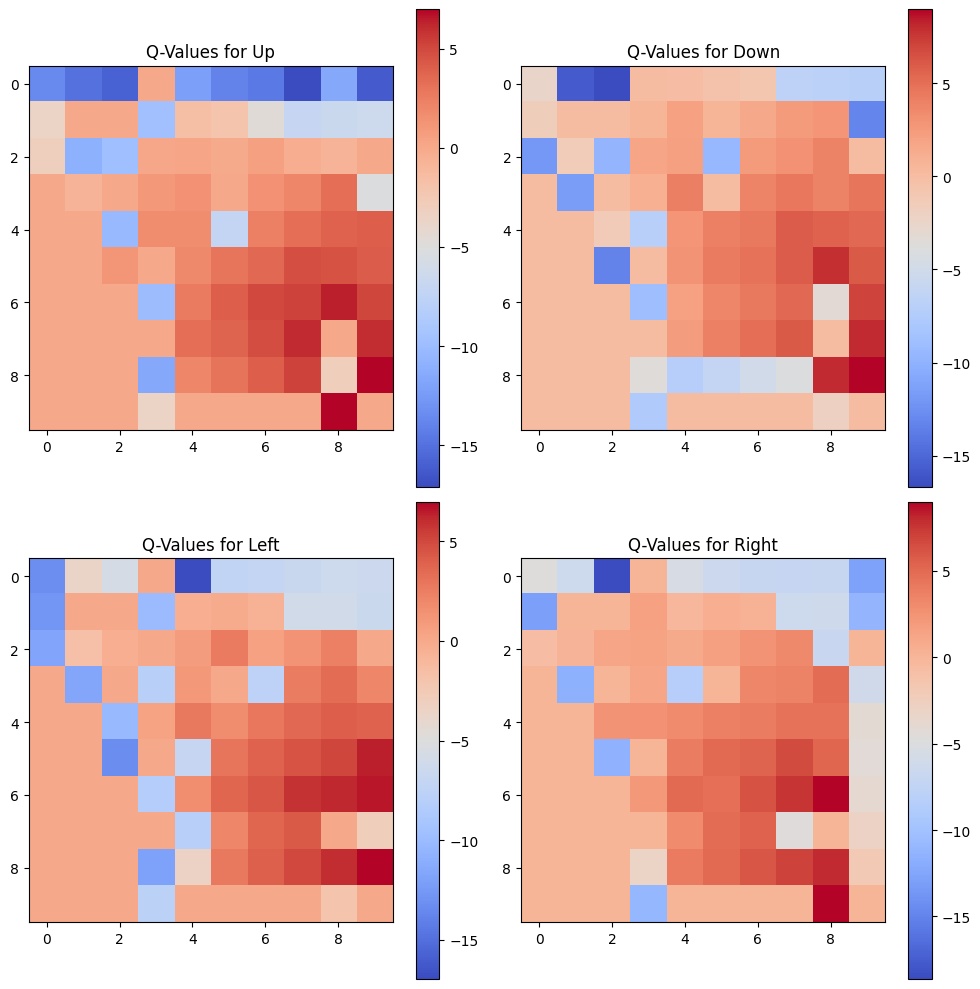

In [201]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
actions_names = ["Up", "Down", "Left", "Right"]

for i, ax in enumerate(axes.flat):
    q_values = np.array([[a.Q_values[row][col][i] for col in range(a.width)] for row in range(a.height)])
    im = ax.imshow(q_values, cmap="coolwarm", origin="upper")
    ax.set_title(f"Q-Values for {actions_names[i]}")
    plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()


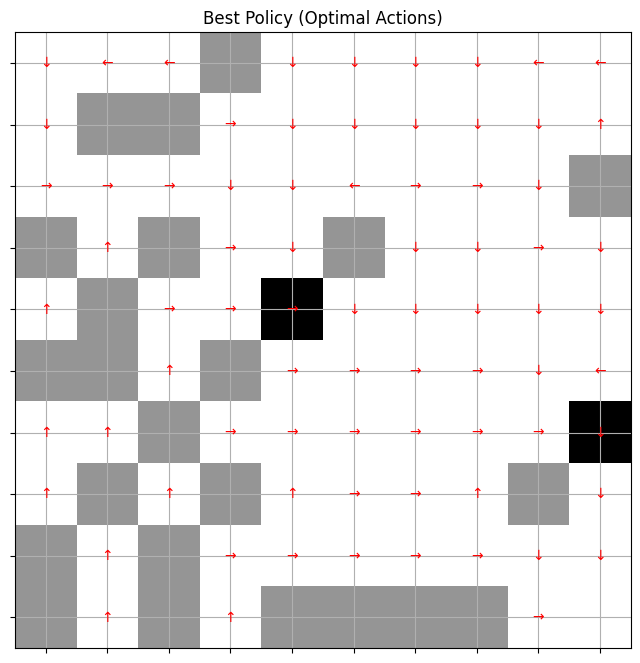

In [202]:
def plot_best_policy(maze):

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(maze.grid, cmap="Greys", origin="upper")  
    
    direction_vectors = [(-0.4, 0), (0.4, 0), (0, -0.4), (0, 0.4)]
    action_labels = ["↑", "↓", "←", "→"]
    
    for row in range(maze.height):
        for col in range(maze.width):
            if maze.grid[row][col] == WALL:  
                continue
            if (row, col) == (maze.height - 1, maze.width - 1):  
                continue

            best_action = np.argmax(maze.Q_values[row][col])

            dr, dc = direction_vectors[best_action]

            ax.text(col, row, action_labels[best_action], color="red",
                    ha="center", va="center", fontsize=10)
    
    ax.set_xticks(range(maze.width))
    ax.set_yticks(range(maze.height))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title("Best Policy (Optimal Actions)")
    plt.grid(True)
    plt.show()
plot_best_policy(a)